# Assignment 2
<i>General instruction for Windows:</i> 
1. To run a cell and move to the next cell: Hold down <strong>Shift</strong> and press <strong>Enter</strong>
2. To run a cell and stay in the same cell: Hold down <b>Ctrl</b> and press <b>Enter</b>
3. Use the arrow up and down to navigate or do it manually as you prefer
4. Escape from typing a cell: Hit <b>Esc</b>

Visit https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330 for a detailed instruction of shortcuts for jupyter notebook. Google for other operating system.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [2]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


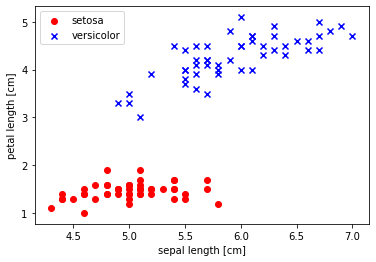

In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Question 0. Manual Perceptron Training 

Below you can see the first 5 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1)

In [5]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]), array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=-0.2, w2=0.1

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):

**Addendum**: If it is the case that all points are classified correctly, just flip all labels to the other class, so that they are all classified incorrectly, and then do the updates. (I think $y=1$ for all labels should do that). 


<br> delta w = 0.1(-1-1) = -0.2
<br> new delta w0 = 0.1 + (-0.2) = -0.1
<br> delta w1 = -0.2 + (-.2) = -0.4
<br> delta w2 = -0.2 + 0.1 = -0.1
<br> z = (-0.1) + (-0.1) + (-0.4) = -0.6
<br> Hence, the class is classified correctly.

## Question 1. Perceptron Code Modification

The following code is the perceptron implementation from the textbook (with only three lines inserted).

In [6]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        ### THIS WILL BE USED TO STORE THE WEIGHTS: ###
        self.weight = []


        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
                self.weight.append(self.w_)
                
                ### ADDING ITERATIONS: ###
                self.n_iter += self.n_iter
            
                self.errors_.append(errors)
                
            if(errors == 0): ### IF THE ERROR IS ZERO THIS WILL STOP/BREAK ###
                break
            
            # my do-nothing code
            IK = 2020
            # my do-nothing code
        
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

 
Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed (**optional** -- but you can use this to verify your manual calculations) 

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



## Question2: Experimenting with hyperparameters

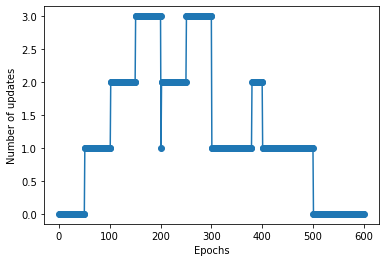

In [7]:
ppn = Perceptron(eta=0.1, n_iter=20, random_state=1)

ppn.fit(X, y,)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

In [69]:
ppn.weight

[array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345, -0.00408956,  0.00293428]),
 array([ 0.01564345,

In [70]:
ppn.n_iter

2296261390548509048465666402355363968044635404177390400955285473651532522784740627713318972633012539836891929277974925546894237921726110662851862712333306370782599782906245600013775582964800897428578539801269724895632309272927767278946340520809327079418099931163247976178892592112466232990723284439406653626883378179689170112047589696158281178018695530008580054334132516610440162644725625835225357666344131979907928362540435597168080843197063665030817788678041838411099155671793440783201639144332611655107608511674520310566975728388641090178305515677652503508710576016456855416359309075243697022980587520

In [71]:
ppn.errors_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 38,
 38,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 26,
 27,
 28,
 28,
 29,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 14,
 1

Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$. 

Please give your answers in the cell below. 

<br>Double click here to type your answer:
<br> (i). Here I used eta 0.00001, which is a number that I kept changing  until it took more than 20 iterations to converge.
<br> (ii). No, not able to find for which the process fails to converger in less than 30 iterations.
<br> (iii). Two different settings for the random stat that give different convergence patterns for the same $\eta$: Where the random state settings were changed to scale two times by inserting different numbers into loc and scale. For example, this would happen in this part of the code: 
<br> rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

## Question 3: Visualizing multiple decision regions over time 

Here is the function for visualizing decision regions

In [72]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

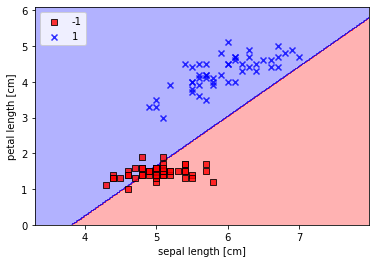

In [73]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

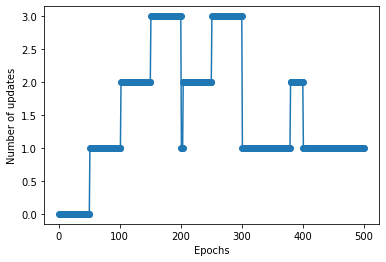

In [74]:
ppn_five = Perceptron(eta=.01, n_iter=5, random_state=1)
ppn_five.fit(X,y)
plt.plot(range(1, len(ppn_five.errors_) + 1), ppn_five.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

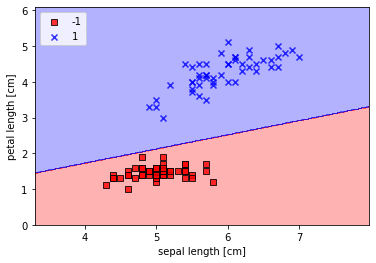

In [75]:
plot_decision_regions(X, y, classifier=ppn_five)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc= 'upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

## Question 4: Changing the data order in training

The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron. 


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code. 

In [76]:
# establish a random shuffle
s = np.arange(50).reshape(50)
np.random.shuffle(s)

# shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];

Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata) 

What do you observe?

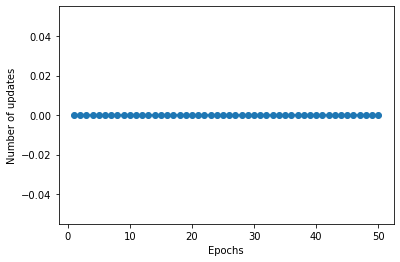

In [77]:
ppn = Perceptron(eta=.00001, n_iter=20, random_state=1)
ppn.fit(X_shuffle, y_shuffle)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [78]:
ppn.errors_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

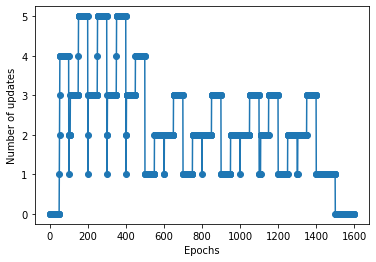

In [79]:
ppn = Perceptron(eta=.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

-- Give your answers here

<br> (i). I suffled the data with 50 instead of 10 and used 0.00001 for my eta. The first plot shows a straight line with the 50 points. I am sure that this is not correct but I can't see where I am going wrong. 
<br> (ii). Eta took 50 for shuffled data.
<br> (iii). The error are all zeros. We can see this from the plot but also from outputting error separately. Same here, I don't know how to fix this problem. I'm sure that I am not correct.

## Question 5: Questions on Perceptrons

Two theoretical questions

**(i)**  Suppose we invoke the following: 





In [80]:
def predict(self, X):
    ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
    ppn.fit(X, y)
    return np.where(self.net_input(X) > 0.0, 1, -1)

The training labels y are -1 and 1 on this data set. Suppose however that we change the training labels to 0 and 1 respectively. Let's say that the new labels are in a vector y1

Fill-out the missing argument so that the perceptron fit happens in an identical way to the above two lines. 


In [81]:
def fit(self, X, y1):
    ppn = Perceptron(eta= 0.1, n_iter= 10, random_state= 1)
    ppn.fit(X, y1)

**(ii)** Suppose we have a 2-dimensional data set. Then we transform data point $x^{(1)} = (x_1^{(1)}, x_2^{(1)})$ as follows: $\tilde{x^{(1)}} = ( a x_1^{(1)}- c, b x_2^{(1)}-c)$, where $a,b,c$ are constant numbers. If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

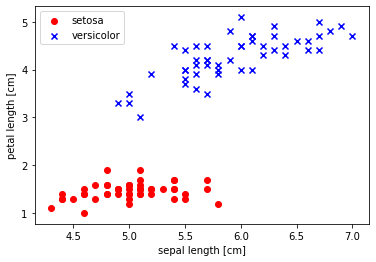

In [82]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

If our dataset it linearly seperable then it is true that the transformed one will be as well. If we were to transform a data point X by multiplying a constant to it, then the new datapoint X' will be either smaller or larger than X, which will simply move the point up or down around the plot. Doing this to all of the points at once, will still allow us to find a linear separatability in the transformed data. 
<br> 
if there exists a 'good' perceptron for the original data set, then the weights for the perceptron that works on the transformed set would be that of which it was changed by and how much. 